In [1]:
import pandas as pd

# Load the data
data_path = 'wiki4he/wiki4HE.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

,AGE;GENDER;DOMAIN;PhD;YEARSEXP;UNIVERSITY;UOC_POSITION;OTHER_POSITION;OTHERSTATUS;USERWIKI;PU1;PU2;PU3;PEU1;PEU2;PEU3;ENJ1;ENJ2;Qu1;Qu2;Qu3;Qu4;Qu5;Vis1;Vis2;Vis3;Im1;Im2;Im3;SA1;SA2;SA3;Use1;Use2;Use3;Use4;Use5;Pf1;Pf2;Pf3;JR1;JR2;BI1;BI2;Inc1;Inc2;Inc3;Inc4;Exp1;Exp2;Exp3;Exp4;Exp5
0,40;0;2;1;14;1;2;?;?;0;4;4;3;5;5;3;4;4;3;3;2;2;...
1,42;0;5;1;18;1;2;?;?;0;2;3;3;4;4;3;3;4;4;4;3;3;...
2,37;0;4;1;13;1;3;?;?;0;2;2;2;4;4;3;3;3;2;2;2;5;...
3,40;0;4;0;13;1;3;?;?;0;3;3;4;3;3;3;4;3;3;4;3;3;...
4,51;0;6;0;8;1;3;?;?;1;4;3;5;5;4;3;4;4;4;5;4;3;4...


In [2]:
# Load the data with the correct delimiter
df = pd.read_csv(data_path, delimiter=';')

# Display the first few rows of the DataFrame
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


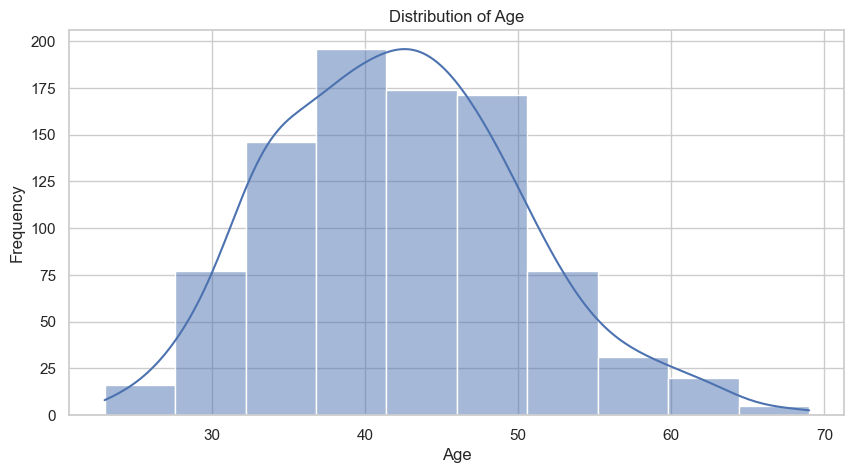

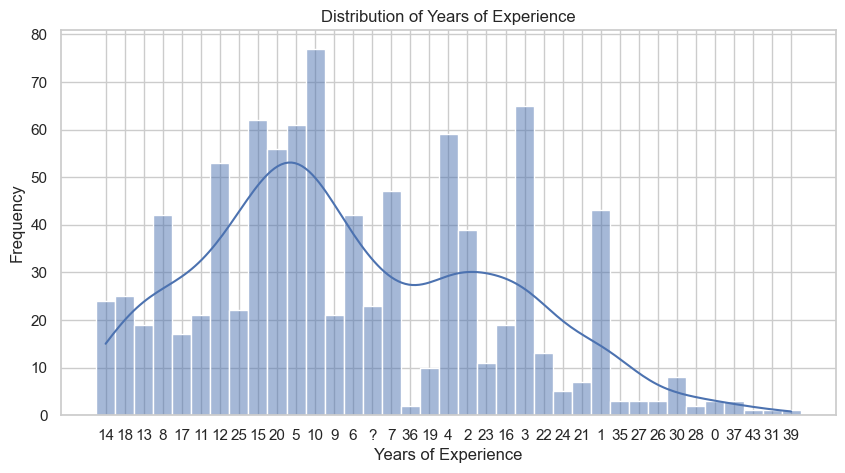

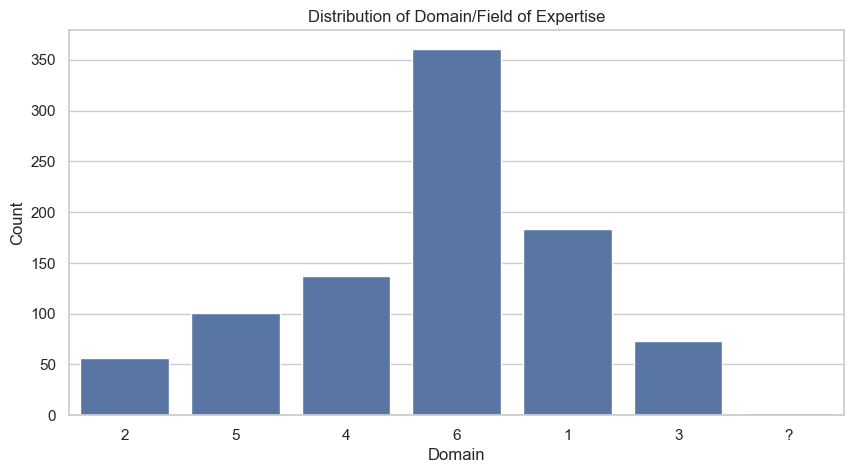

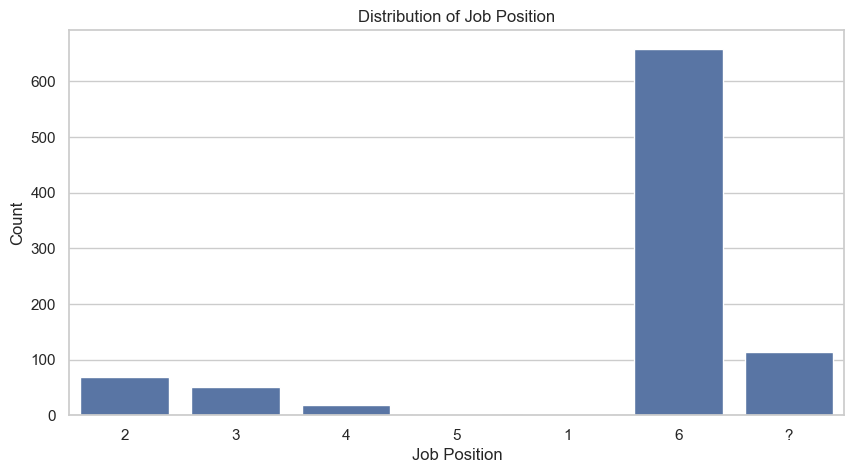

(count    913.000000
 mean      42.246440
 std        8.058418
 min       23.000000
 25%       36.000000
 50%       42.000000
 75%       47.000000
 max       69.000000
 Name: AGE, dtype: float64,
 count     913
 unique     37
 top        10
 freq       77
 Name: YEARSEXP, dtype: object)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Summary statistics for age and years of experience
age_summary = df['AGE'].describe()
yearsexp_summary = df['YEARSEXP'].describe()

# Plotting the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of years of experience
plt.figure(figsize=(10, 5))
sns.histplot(df['YEARSEXP'], bins=10, kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of domain/field of expertise
plt.figure(figsize=(10, 5))
sns.countplot(x='DOMAIN', data=df)
plt.title('Distribution of Domain/Field of Expertise')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of job position
plt.figure(figsize=(10, 5))
sns.countplot(x='UOC_POSITION', data=df)
plt.title('Distribution of Job Position')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.show()

age_summary, yearsexp_summary

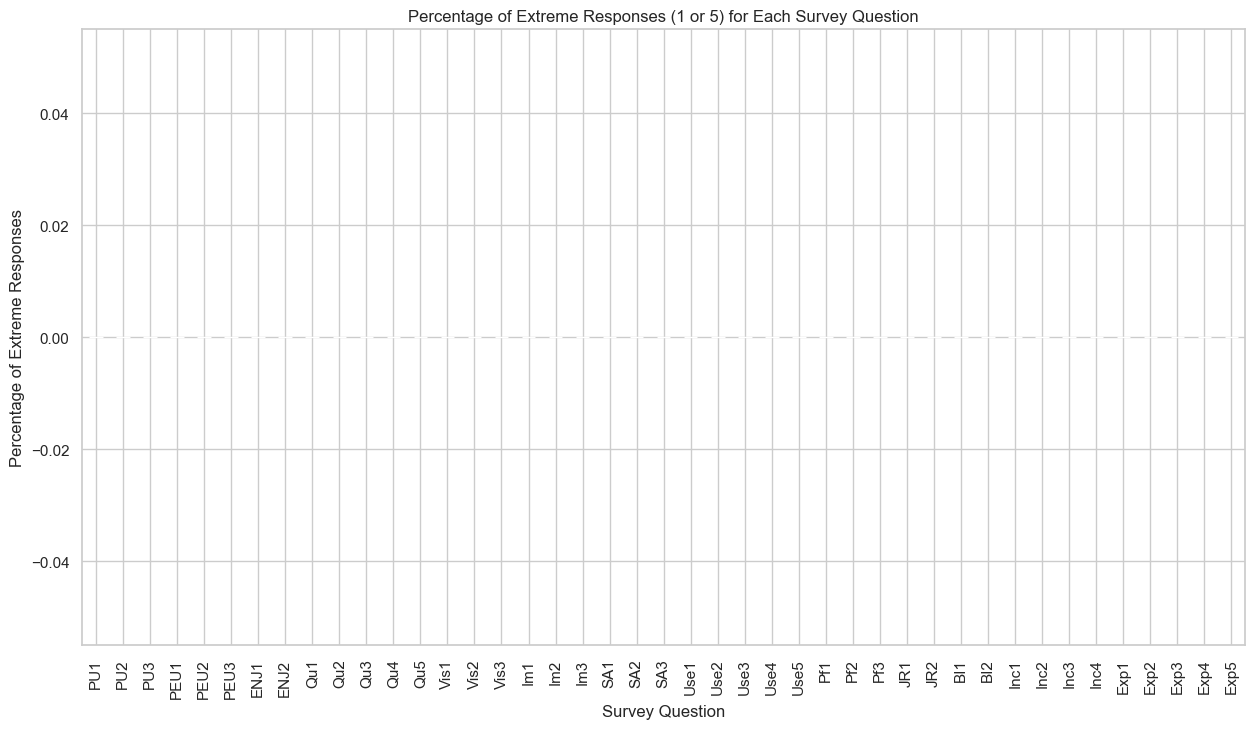

PU1     0.0
PU2     0.0
PU3     0.0
PEU1    0.0
PEU2    0.0
PEU3    0.0
ENJ1    0.0
ENJ2    0.0
Qu1     0.0
Qu2     0.0
Qu3     0.0
Qu4     0.0
Qu5     0.0
Vis1    0.0
Vis2    0.0
Vis3    0.0
Im1     0.0
Im2     0.0
Im3     0.0
SA1     0.0
SA2     0.0
SA3     0.0
Use1    0.0
Use2    0.0
Use3    0.0
Use4    0.0
Use5    0.0
Pf1     0.0
Pf2     0.0
Pf3     0.0
JR1     0.0
JR2     0.0
BI1     0.0
BI2     0.0
Inc1    0.0
Inc2    0.0
Inc3    0.0
Inc4    0.0
Exp1    0.0
Exp2    0.0
Exp3    0.0
Exp4    0.0
Exp5    0.0
dtype: float64

In [4]:
# Extracting the columns related to survey questions
survey_columns = df.columns[10:]

# Calculating the percentage of extreme responses (1 or 5) for each question
extreme_responses = df[survey_columns].apply(lambda x: (x == 1).sum() + (x == 5).sum()) / len(df) * 100

# Plotting the percentage of extreme responses for each question
plt.figure(figsize=(15, 8))
extreme_responses.sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Extreme Responses (1 or 5) for Each Survey Question')
plt.xlabel('Survey Question')
plt.ylabel('Percentage of Extreme Responses')
plt.show()

extreme_responses

In [5]:
# Analyzing the usage of Wikipedia across different domains
domain_wiki_usage = df.groupby('DOMAIN')['USERWIKI'].mean() * 100

# Plotting the usage of Wikipedia across different domains
plt.figure(figsize=(15, 8))
domain_wiki_usage.sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Respondents Using Wikipedia by Domain')
plt.xlabel('Domain')
plt.ylabel('Percentage of Respondents Using Wikipedia')
plt.show()

# Analyzing the practice of citing Wikipedia in academic papers
# Assuming 'Qu5' represents the practice of citing Wikipedia in academic papers
domain_wiki_citing = df.groupby('DOMAIN')['Qu5'].mean()

# Plotting the practice of citing Wikipedia in academic papers across different domains
plt.figure(figsize=(15, 8))
domain_wiki_citing.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Likert Scale Response for Citing Wikipedia in Academic Papers by Domain')
plt.xlabel('Domain')
plt.ylabel('Average Likert Scale Response')
plt.show()

domain_wiki_usage, domain_wiki_citing

TypeError: agg function failed [how->mean,dtype->object]

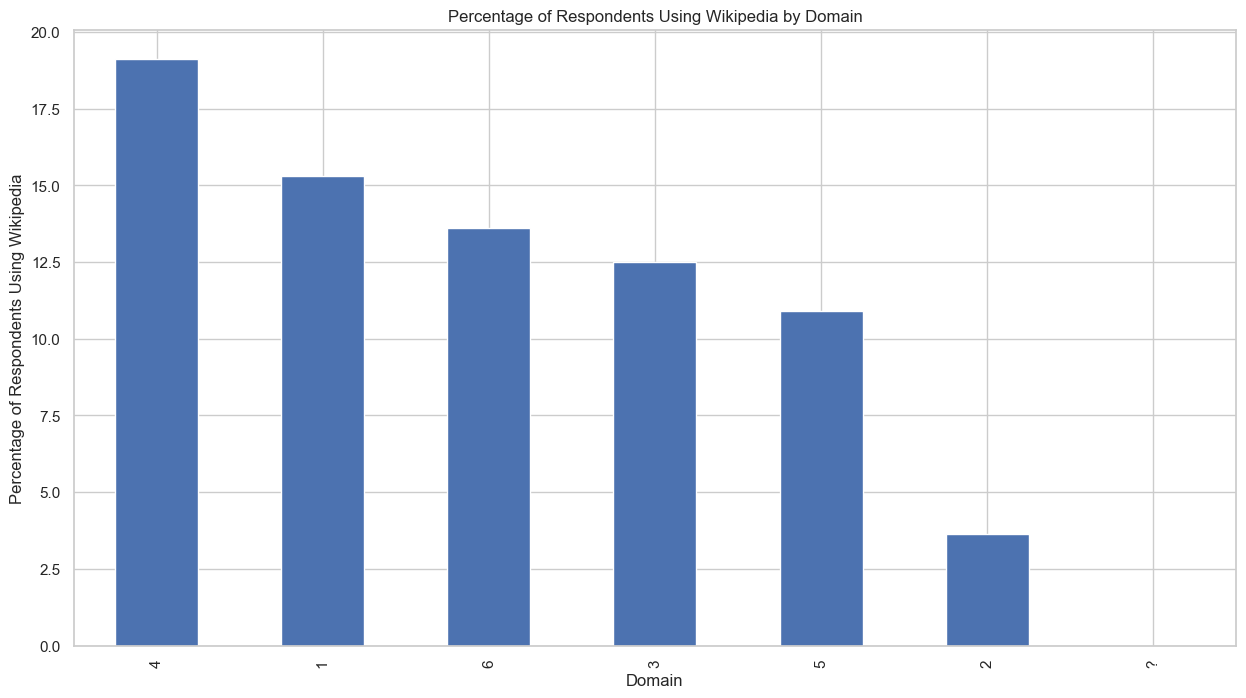

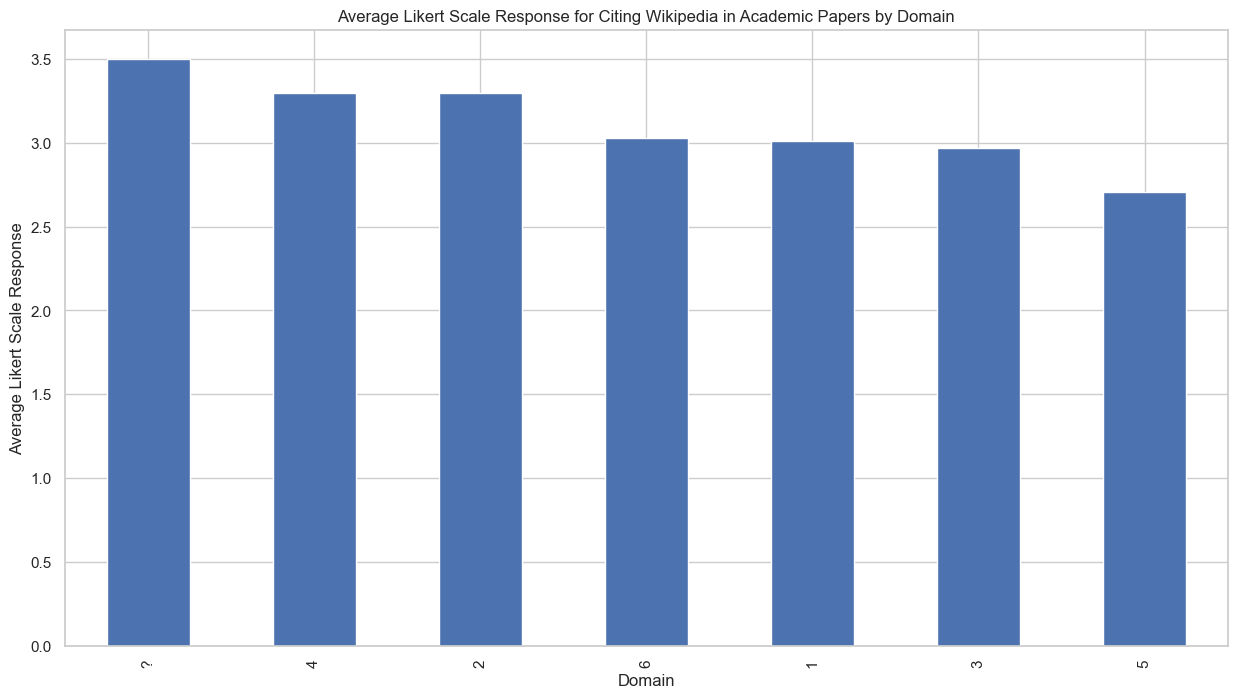

(DOMAIN
 1    15.300546
 2     3.636364
 3    12.500000
 4    19.117647
 5    10.891089
 6    13.611111
 ?     0.000000
 Name: USERWIKI, dtype: float64,
 DOMAIN
 1    3.011236
 2    3.296296
 3    2.971429
 4    3.296296
 5    2.704082
 6    3.025937
 ?    3.500000
 Name: Qu5, dtype: float64)

In [6]:
# Convert USERWIKI column to numeric
df['USERWIKI'] = pd.to_numeric(df['USERWIKI'], errors='coerce')

# Analyzing the usage of Wikipedia across different domains
domain_wiki_usage = df.groupby('DOMAIN')['USERWIKI'].mean() * 100

# Plotting the usage of Wikipedia across different domains
plt.figure(figsize=(15, 8))
domain_wiki_usage.sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Respondents Using Wikipedia by Domain')
plt.xlabel('Domain')
plt.ylabel('Percentage of Respondents Using Wikipedia')
plt.show()

# Analyzing the practice of citing Wikipedia in academic papers
# Assuming 'Qu5' represents the practice of citing Wikipedia in academic papers
df['Qu5'] = pd.to_numeric(df['Qu5'], errors='coerce')
domain_wiki_citing = df.groupby('DOMAIN')['Qu5'].mean()

# Plotting the practice of citing Wikipedia in academic papers across different domains
plt.figure(figsize=(15, 8))
domain_wiki_citing.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Likert Scale Response for Citing Wikipedia in Academic Papers by Domain')
plt.xlabel('Domain')
plt.ylabel('Average Likert Scale Response')
plt.show()

domain_wiki_usage, domain_wiki_citing